In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


To download your data use this link : https://www.kaggle.com/arjunbhasin2013/ccdata

In [4]:
data1 = pd.read_csv("marketing_data.csv" , header = 0)

In [5]:
data1


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


#CUSTID: Identification of Credit Card holder 

#BALANCE: Balance amount left in customer's account to make purchases

#BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

#PURCHASES: Amount of purchases made from account

#ONEOFFPURCHASES: Maximum purchase amount done in one-go

#INSTALLMENTS_PURCHASES: Amount of purchase done in installment

#CASH_ADVANCE: Cash in advance given by the user

#PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

#ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

#PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

#CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid

#CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"

#PURCHASES_TRX: Number of purchase transactions made

#CREDIT_LIMIT: Limit of Credit Card for user

#PAYMENTS: Amount of Payment done by user

#MINIMUM_PAYMENTS: Minimum amount of payments made by user 

#PRC_FULL_PAYMENT: Percent of full payment paid by user

#TENURE: Tenure of credit card service for user

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

We can see that our data contains some missing values for the two variables "MINIMUM_PAYMENTS" and "CREDIT_LIMIT "

### EDD (EXTENDED DATA DICTIONARY)

In [7]:
data1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
print('Average, min , max' , data1['BALANCE'].mean() , data1['BALANCE'].min() , data1['BALANCE'].max())

Average, min , max 1564.4748276781006 0.0 19043.13856


In [9]:
print(data1[data1.ONEOFF_PURCHASES == data1['ONEOFF_PURCHASES'].max() ])

    CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
550  C10574  11547.52001                1.0   49039.57          40761.25   

     INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
550                 8278.32    558.166886                  1.0   

     ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
550                         1.0                          0.916667   

     CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
550                0.083333                 1            101       22500.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
550  46930.59824       2974.069421              0.25      12  


In [10]:
data1['CASH_ADVANCE'].max()

47137.211760000006

### check if we have any missing data

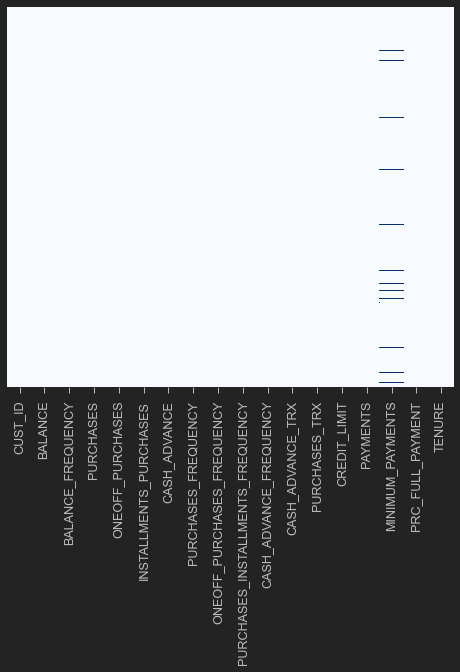

In [11]:
sns.heatmap(data1.isnull(), yticklabels = False, cbar = False, cmap="Blues")

So there are some missing values for the variable MINIMUM_PAYMENTS,and to get the reel number of our missing data let's do this 

In [12]:
data1.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Let's fill up the missing elements with the mean of that variable

In [13]:
data1.loc[(data1['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = data1['MINIMUM_PAYMENTS'].mean()


In [14]:
data1.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [15]:
data1.loc[(data1['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = data1['CREDIT_LIMIT'].mean()

In [16]:
data1.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Now we eliminated all missing Values

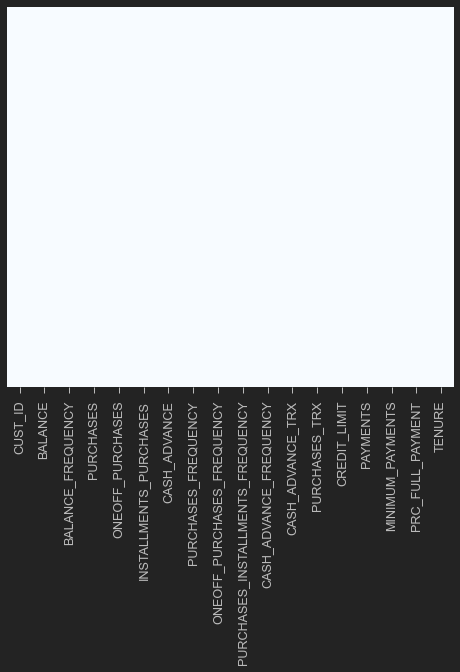

In [17]:
sns.heatmap(data1.isnull(), yticklabels = False, cbar = False, cmap="Blues")

Verifie if we have duplicated Data

In [18]:
data1.duplicated().sum()

0

Eliminate the CUST_ID

In [19]:
data1.drop('CUST_ID' , axis = 1 , inplace = True)

In [20]:
data1

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [21]:
n = len(data1.columns)
n

17

c:\users\noura\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\noura\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\noura\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

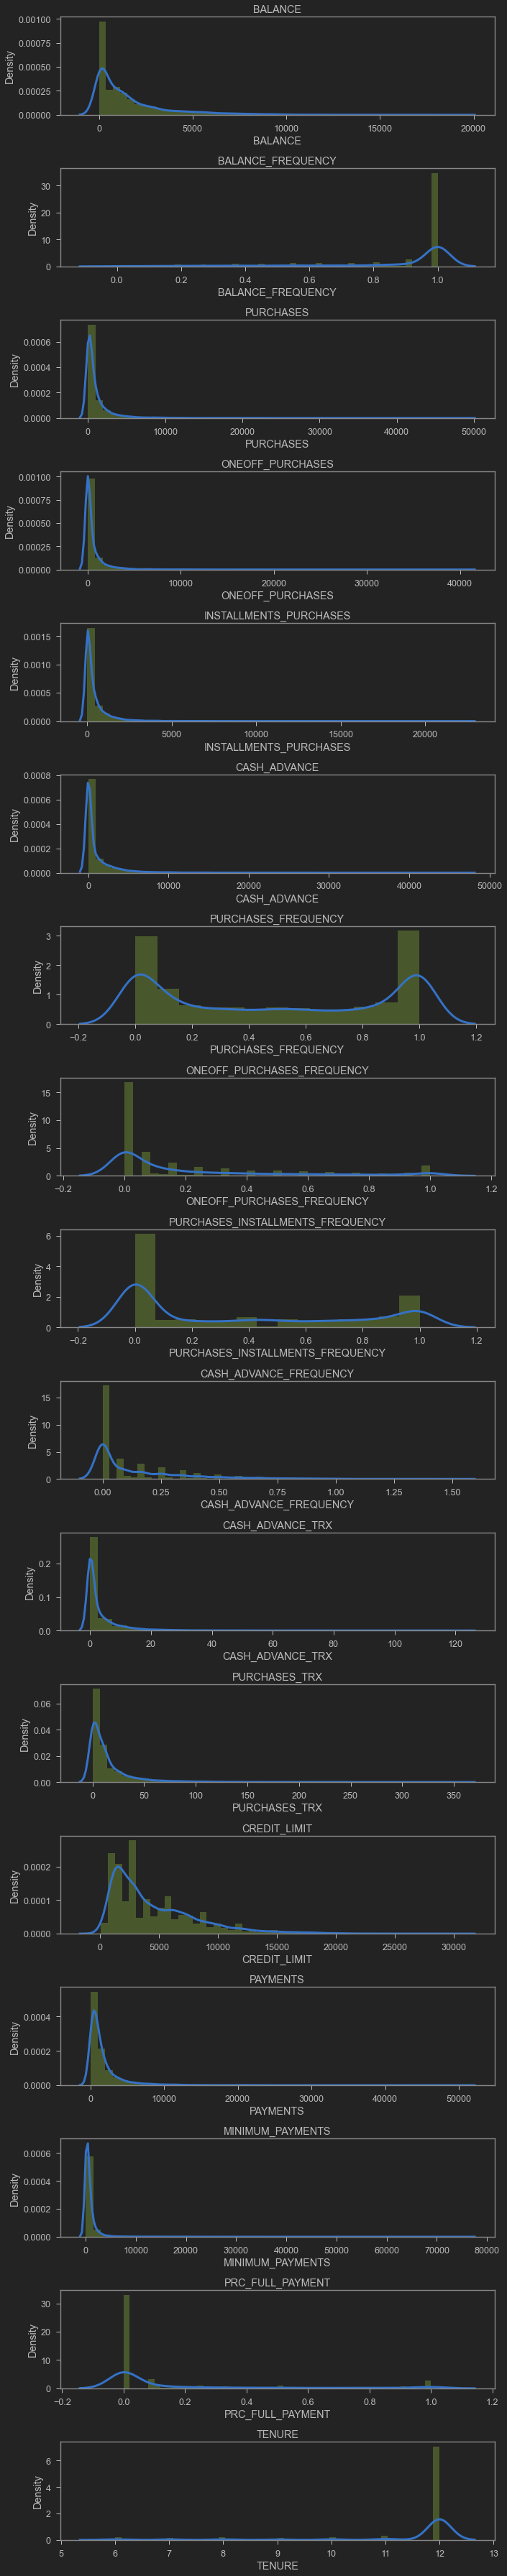

In [22]:
plt.figure(figsize=(10,50))
for i in range(len(data1.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(data1[data1.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(data1.columns[i])

plt.tight_layout()

The correlation matrix between Features

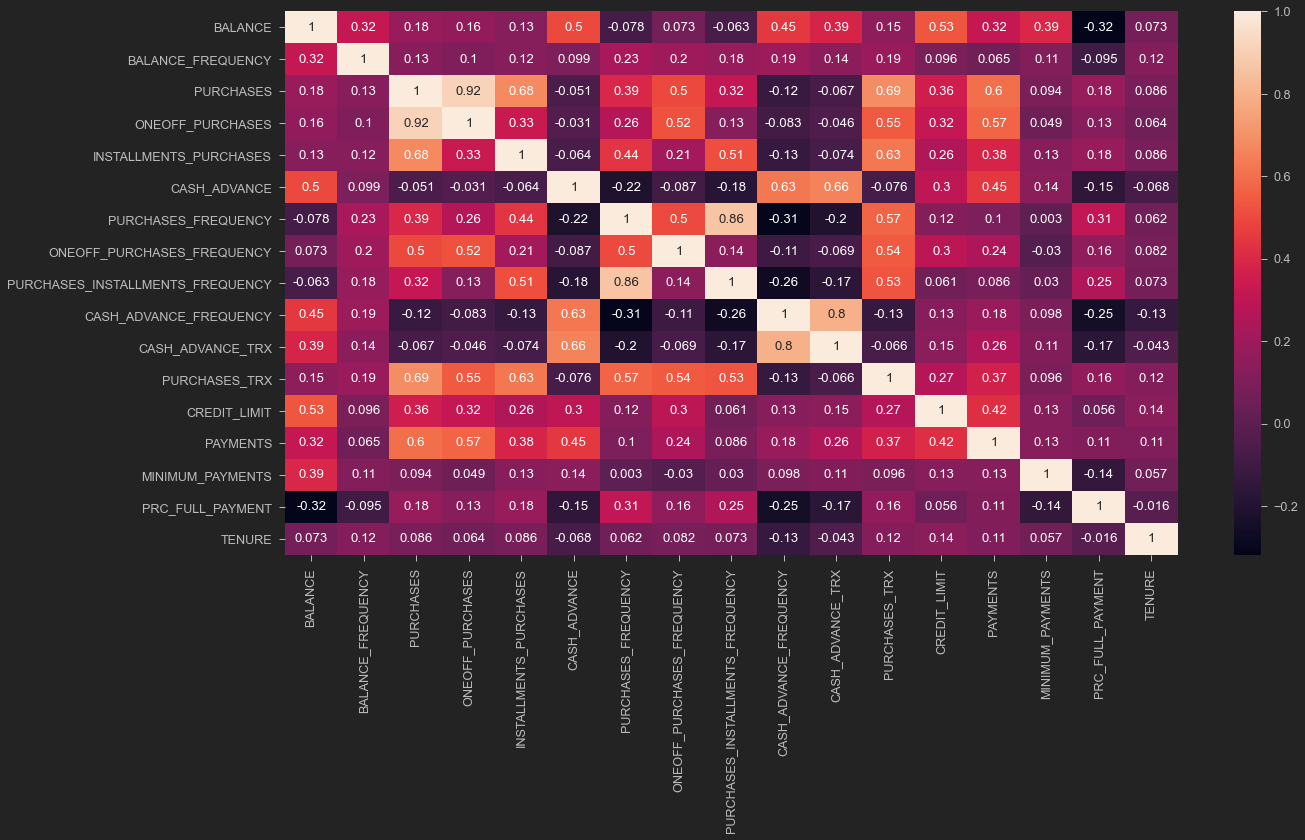

In [23]:
Corr = data1.corr()
f, ax= plt.subplots(figsize = (20,10))
sns.heatmap(Corr , annot =True)


K-means Algorithm

In [24]:
# Let's scale the data first
scaler = StandardScaler()
data1_scaled = scaler.fit_transform(data1)

In [25]:
data1_scaled.shape

(8950, 17)

In [26]:
data1_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

We plot the Wcss / Clusters

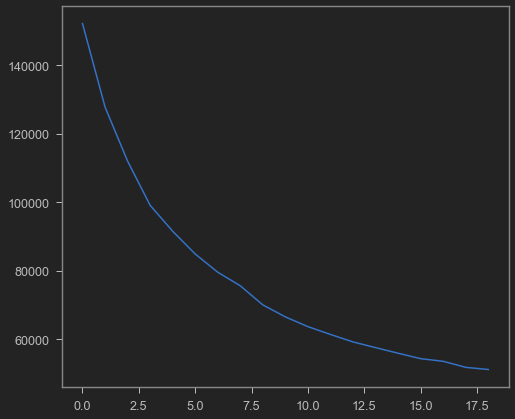

In [27]:
score_1 = []
range_values = range(1,20)

for i in range_values :
  kmeans=KMeans(n_clusters = i)
  kmeans.fit(data1_scaled)
  score_1.append(kmeans.inertia_)


plt.plot(score_1 , 'bx-')

Let's run it with only 7 features

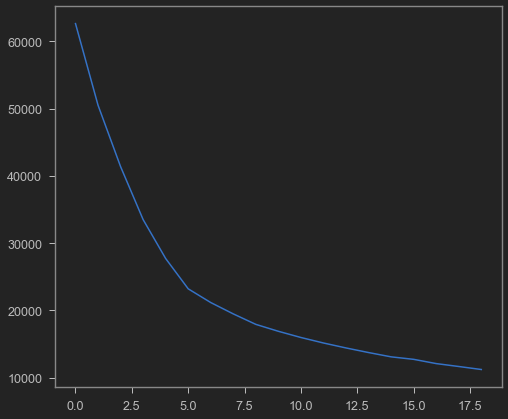

In [28]:
score_1 = []
range_values = range(1,20)

for i in range_values :
  kmeans=KMeans(n_clusters = i)
  kmeans.fit(data1_scaled[:,:7])
  score_1.append(kmeans.inertia_)


plt.plot(score_1 , 'bx-')

Apply K-means Method

In [29]:
kmeans = KMeans(7)
kmeans.fit(data1_scaled)
labels = kmeans.labels_

In [30]:
kmeans.cluster_centers_.shape

(7, 17)

In [31]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [data1.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.335410,-0.341582,-0.283994,-0.209054,-0.287071,0.066403,-0.193767,-0.272626,-0.226075,0.303329,-0.002270,-0.384892,-0.551431,-0.389121,-0.209952,0.012044,-3.190495
1,0.004990,0.403457,-0.343214,-0.224286,-0.399363,-0.106772,-0.809066,-0.334387,-0.752634,0.082342,-0.043177,-0.464238,-0.301917,-0.249619,-0.016148,-0.452290,0.272180
2,1.443484,0.415902,7.043767,6.181111,5.296366,0.029765,1.084224,1.874158,1.042173,-0.253894,-0.050586,4.698379,2.166844,4.825204,1.092576,0.814424,0.333671
3,1.666138,0.393227,-0.207269,-0.151481,-0.211871,1.984894,-0.458872,-0.194104,-0.405497,1.901773,1.911374,-0.245690,1.006700,0.828228,0.549891,-0.391909,0.069763
4,-0.372575,0.330236,-0.041386,-0.233843,0.331585,-0.369357,0.979839,-0.354295,1.171303,-0.478660,-0.363206,0.169977,-0.281545,-0.224580,-0.029161,0.309079,0.254140
5,0.137101,0.430241,0.947607,0.899266,0.588475,-0.306219,1.095965,1.867151,0.543588,-0.407415,-0.316506,1.211206,0.707545,0.398651,-0.032685,0.456257,0.307767
6,-0.701719,-2.134810,-0.307505,-0.230900,-0.302771,-0.321909,-0.549111,-0.429500,-0.442252,-0.520230,-0.375627,-0.417099,-0.172908,-0.201909,-0.257269,0.293989,0.199793


In [32]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [data1.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,866.346588,0.796353,396.446254,245.449794,151.472651,1118.121121,0.412583,0.121128,0.274589,0.195843,3.233333,5.142857,2488.118174,606.676652,374.921780,0.157237,7.247619
1,1574.860249,0.972846,269.922404,220.168583,49.928259,754.964822,0.165633,0.102703,0.065321,0.151622,2.954177,3.170603,3395.952297,1010.521003,826.573473,0.021428,11.881565
2,4568.965194,0.975794,16052.320602,10851.814819,5200.505783,1041.289988,0.925502,0.761555,0.778624,0.084337,2.903614,131.493976,12378.313253,15701.636847,3410.408242,0.391920,11.963855
3,5032.401421,0.970423,560.372036,341.009355,219.475773,5141.287050,0.306183,0.144553,0.203282,0.515708,16.292547,8.602892,8157.235312,4130.782999,2145.703705,0.039088,11.610679
4,788.991029,0.955501,914.783954,204.305742,710.915879,204.311648,0.883607,0.096765,0.829943,0.039360,0.770211,18.934836,3470.073592,1083.006164,796.248703,0.244115,11.857423
5,1849.838945,0.979191,3027.781109,2085.034744,943.218434,336.716284,0.930214,0.759465,0.580473,0.053616,1.088906,44.815893,7068.786210,2887.198379,788.035751,0.287162,11.929190
6,103.905679,0.371554,346.216442,209.190589,137.275475,303.813584,0.269966,0.074329,0.188675,0.031041,0.685450,4.342304,3865.340155,1148.636336,264.651249,0.239701,11.784693


#First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%

#Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)

#Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits

#Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 


In [33]:
labels.shape # Labels associated to each data point

(8950,)

In [34]:
labels.max()

6

In [35]:
labels.min()

0

In [36]:
y_kmeans = kmeans.fit_predict(data1_scaled)
y_kmeans


array([6, 2, 4, ..., 0, 0, 0])

In [37]:
# concatenate the clusters labels to our original dataframe
data1_cluster = pd.concat([data1, pd.DataFrame({'cluster':labels})], axis = 1)
data1_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


#Plot the histogram of various clusters

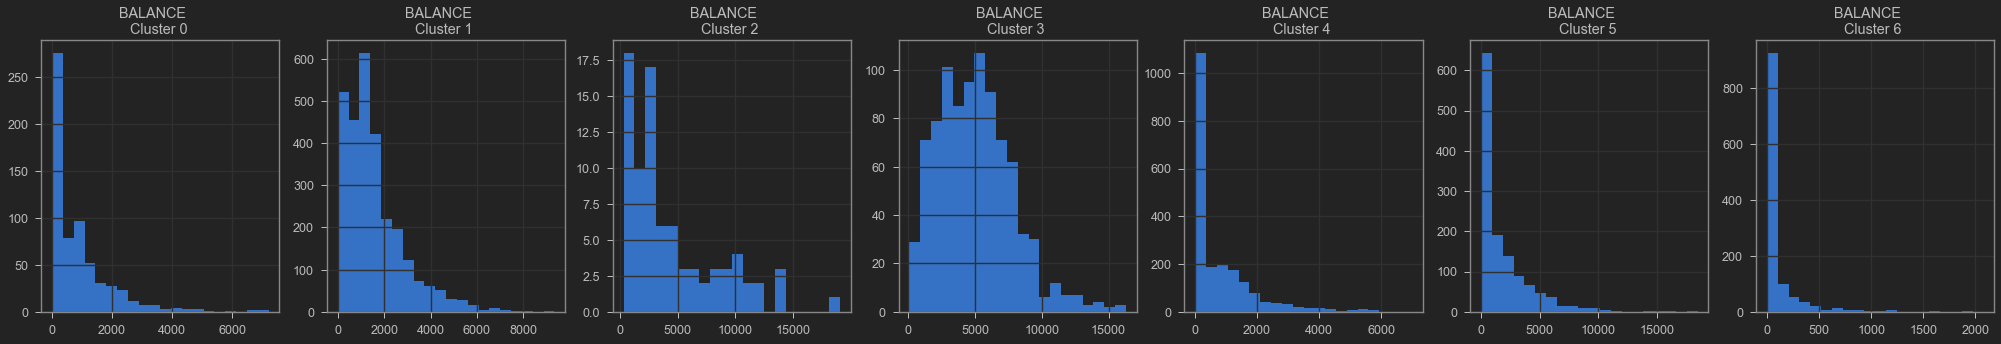

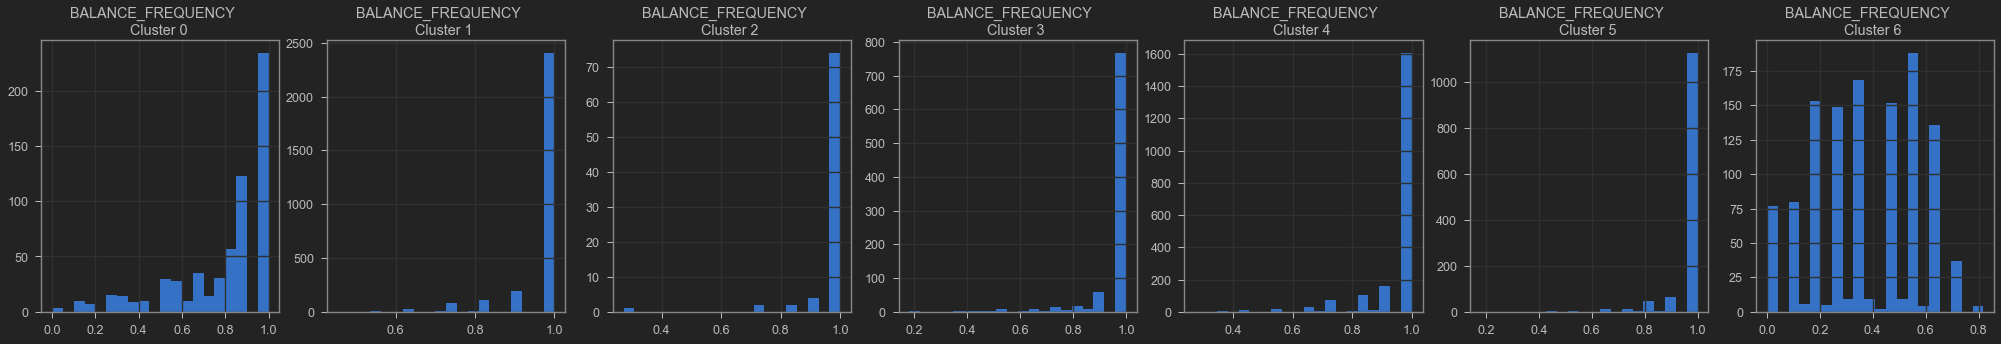

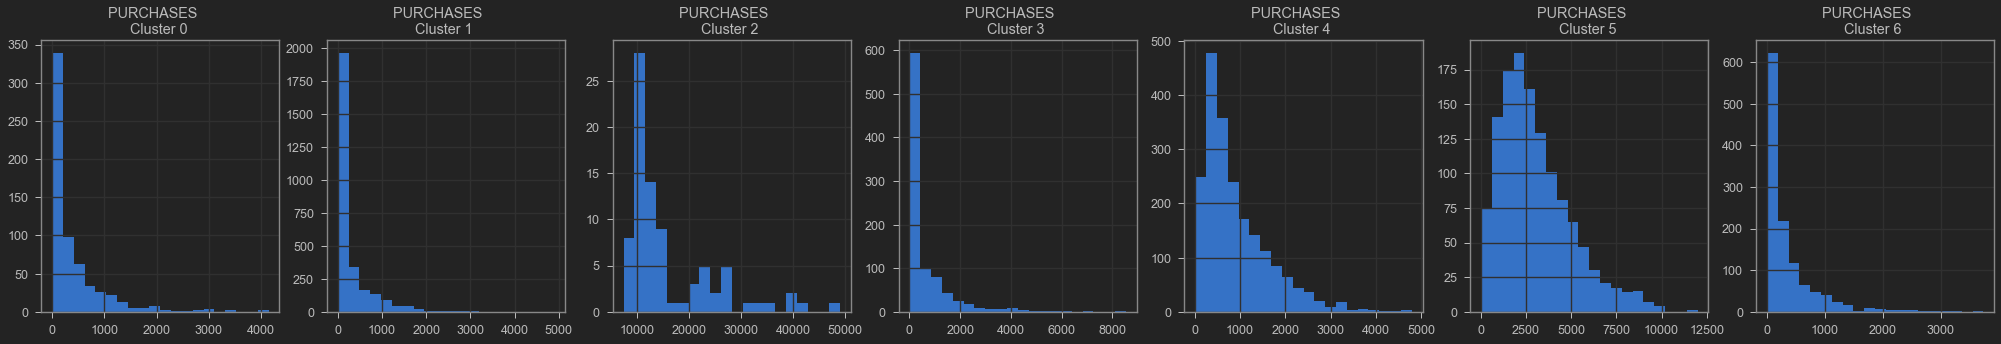

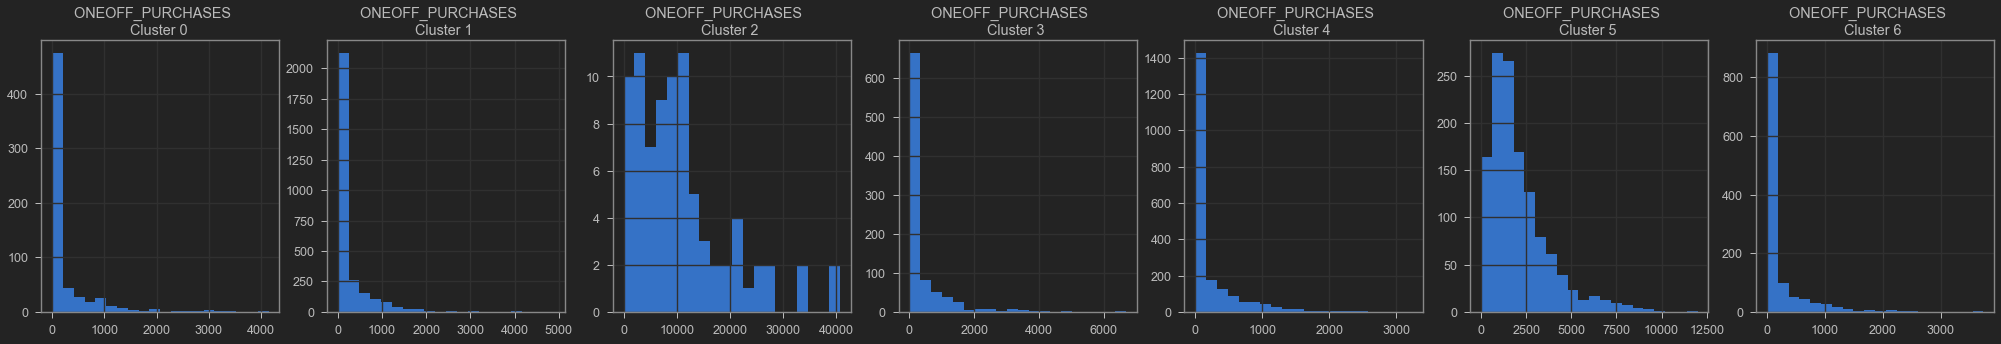

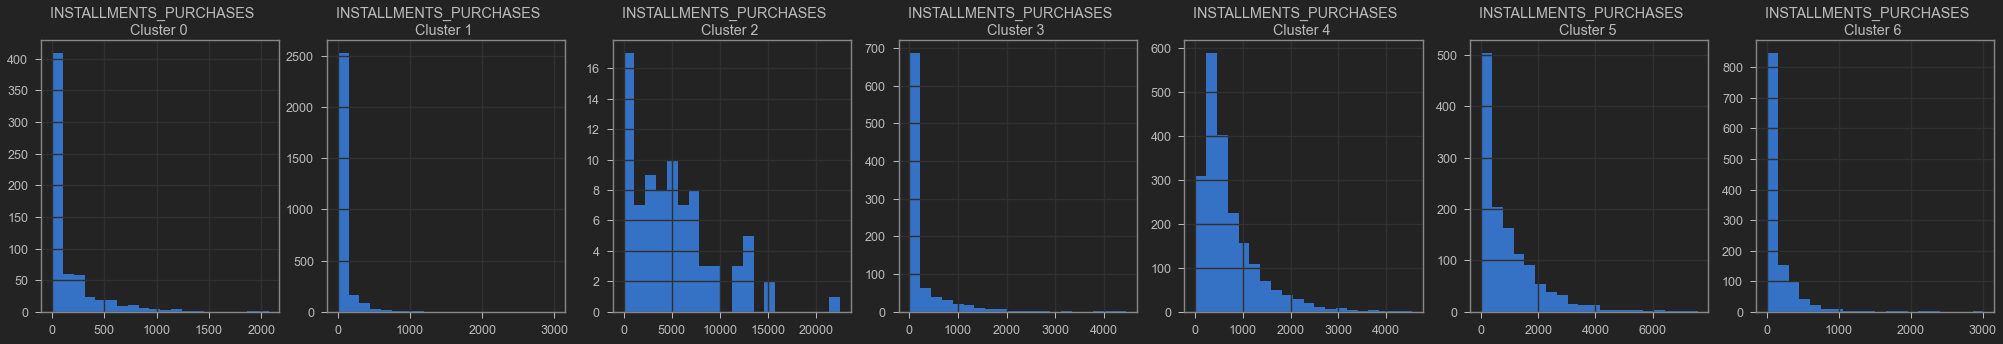

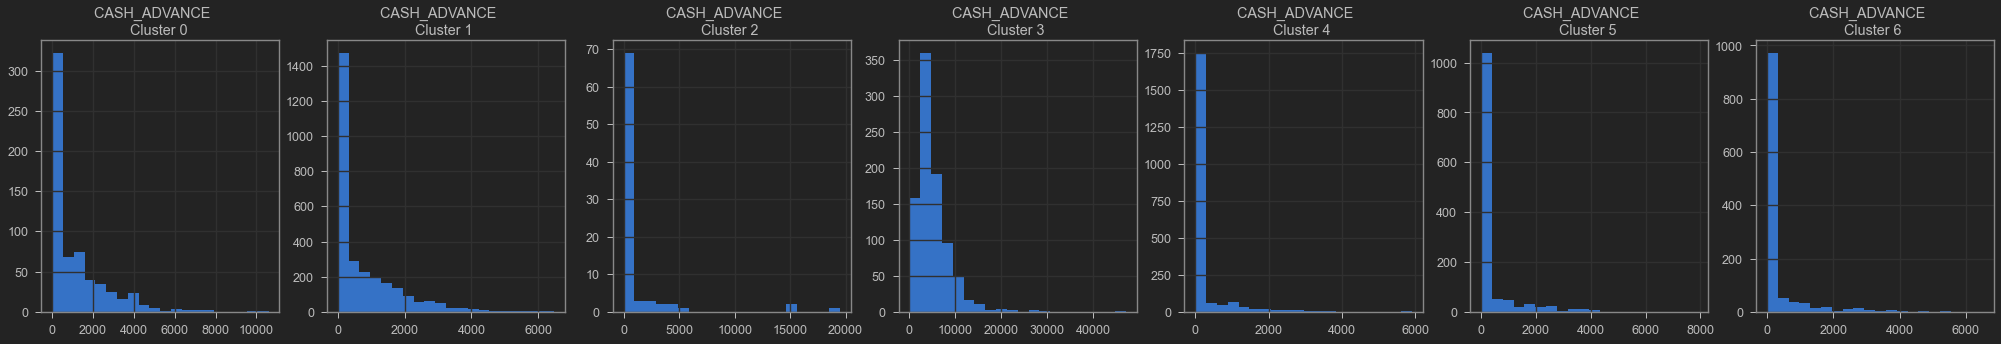

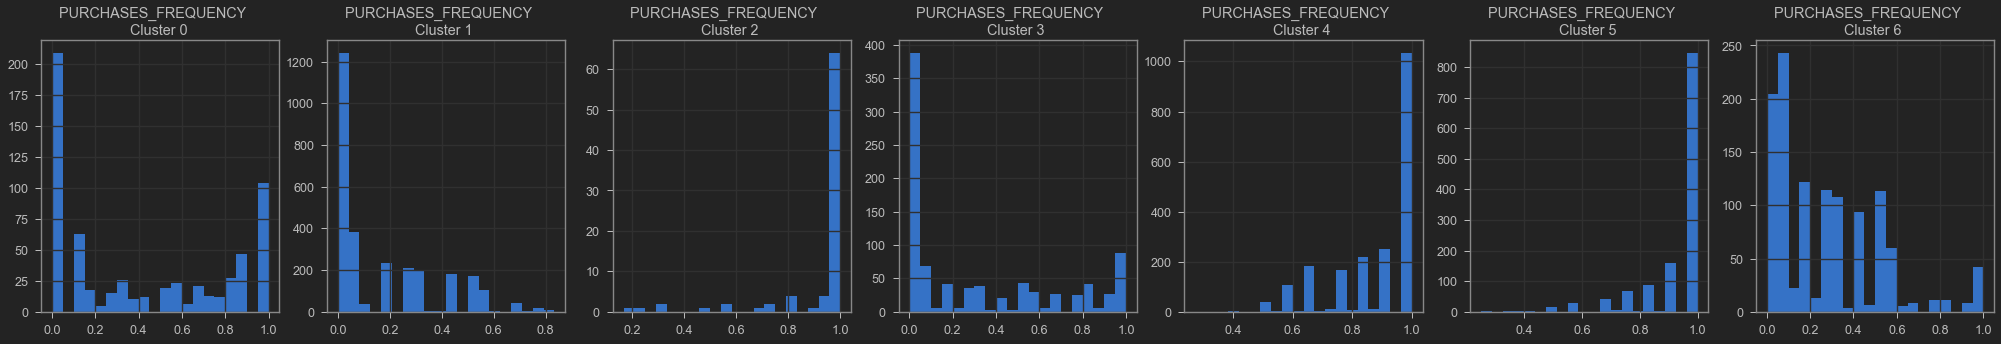

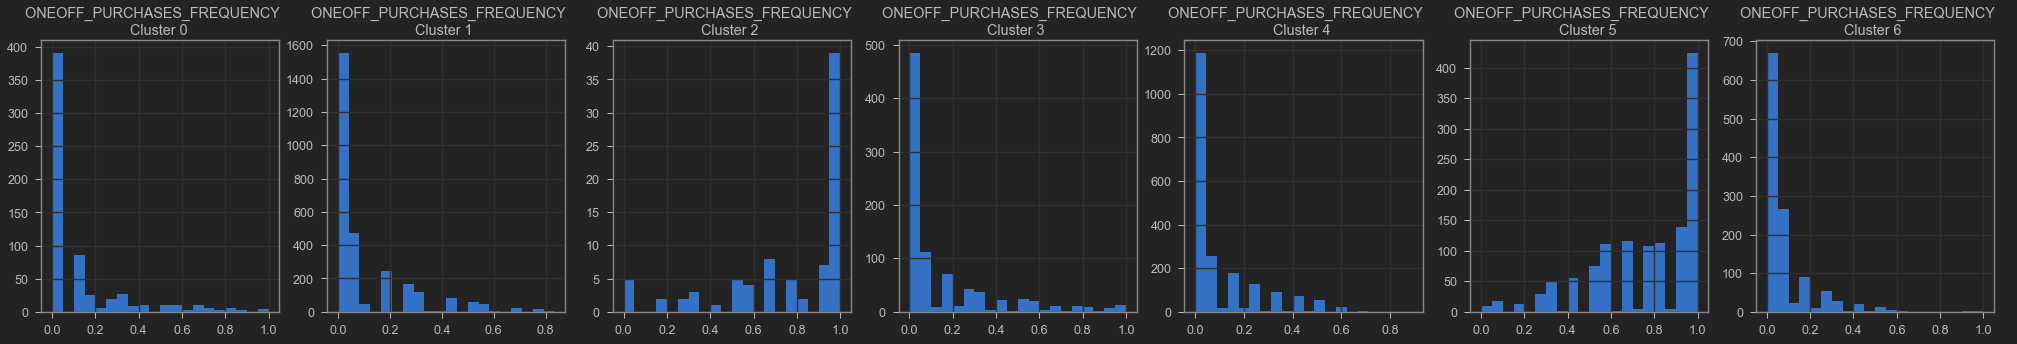

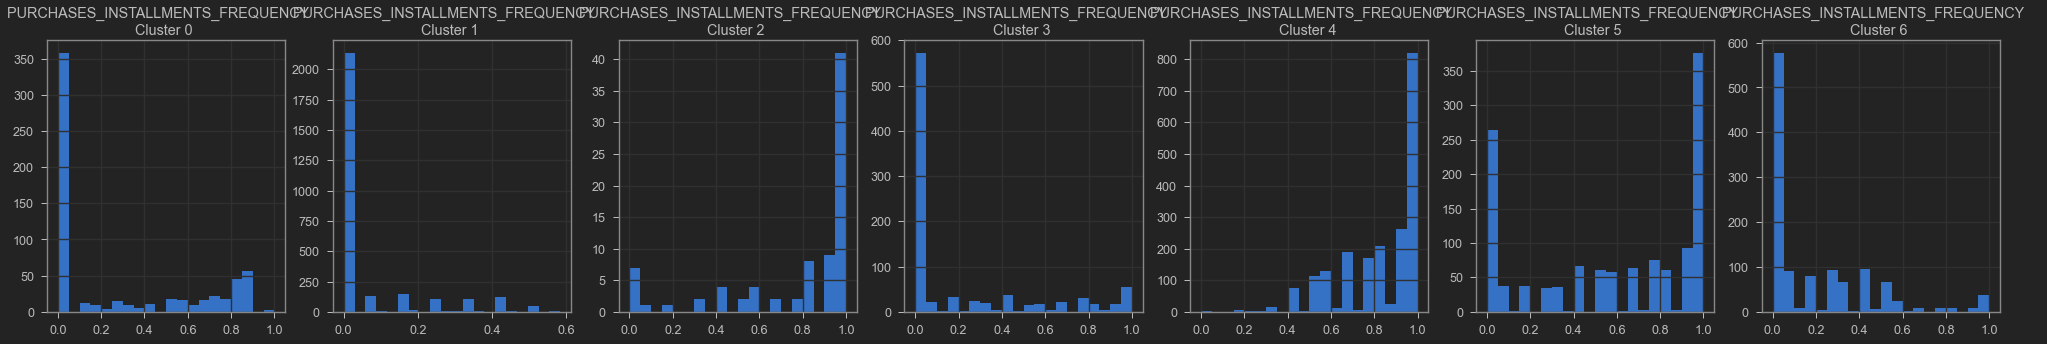

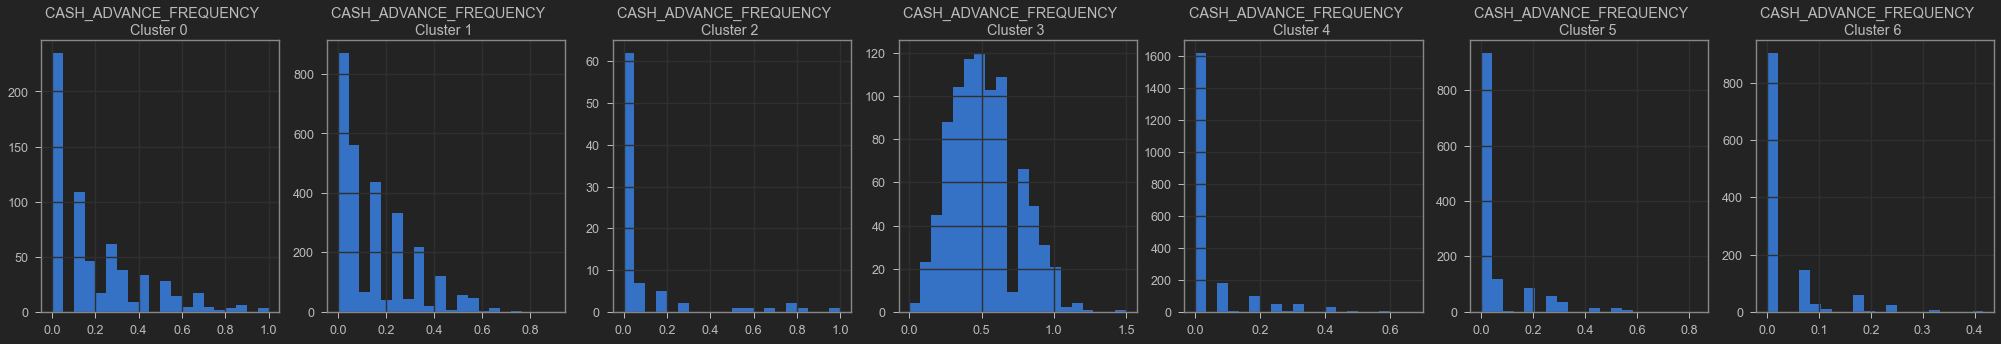

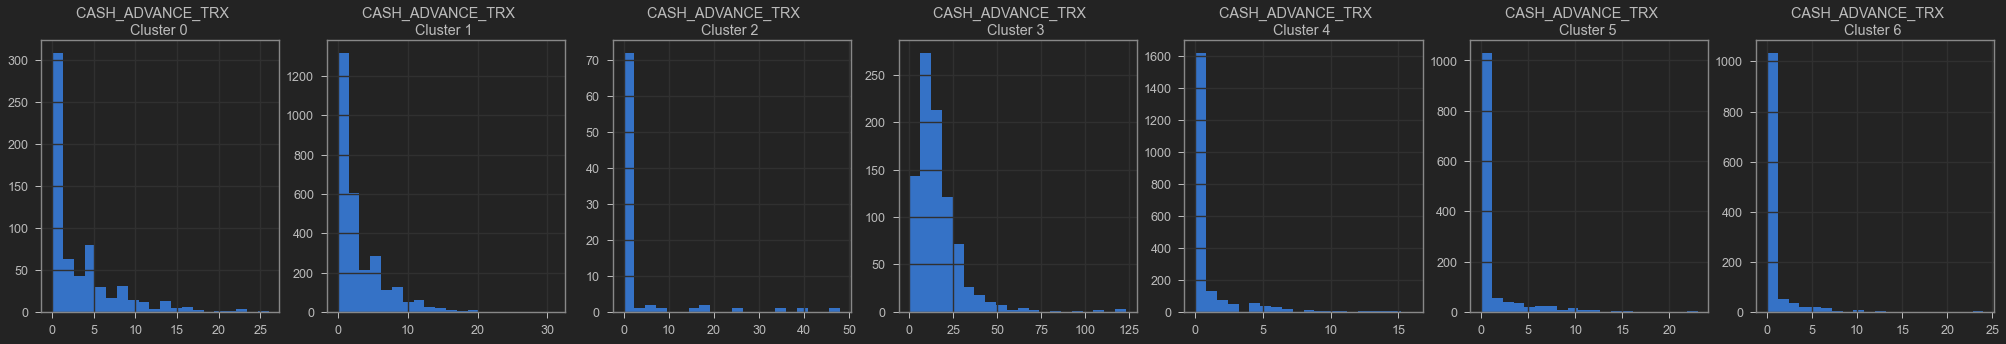

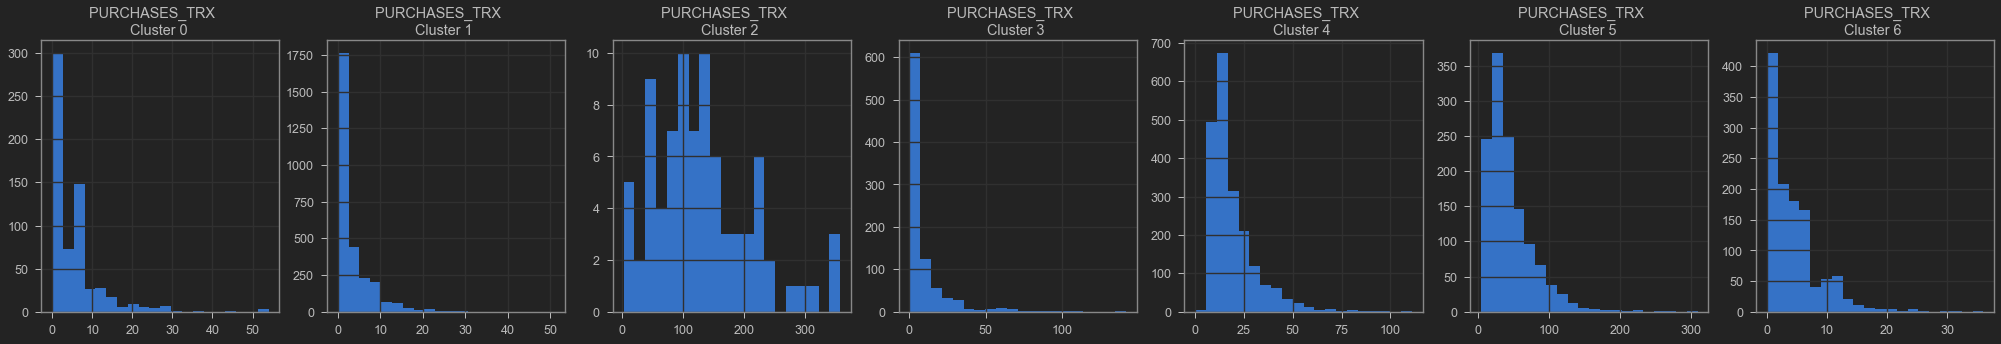

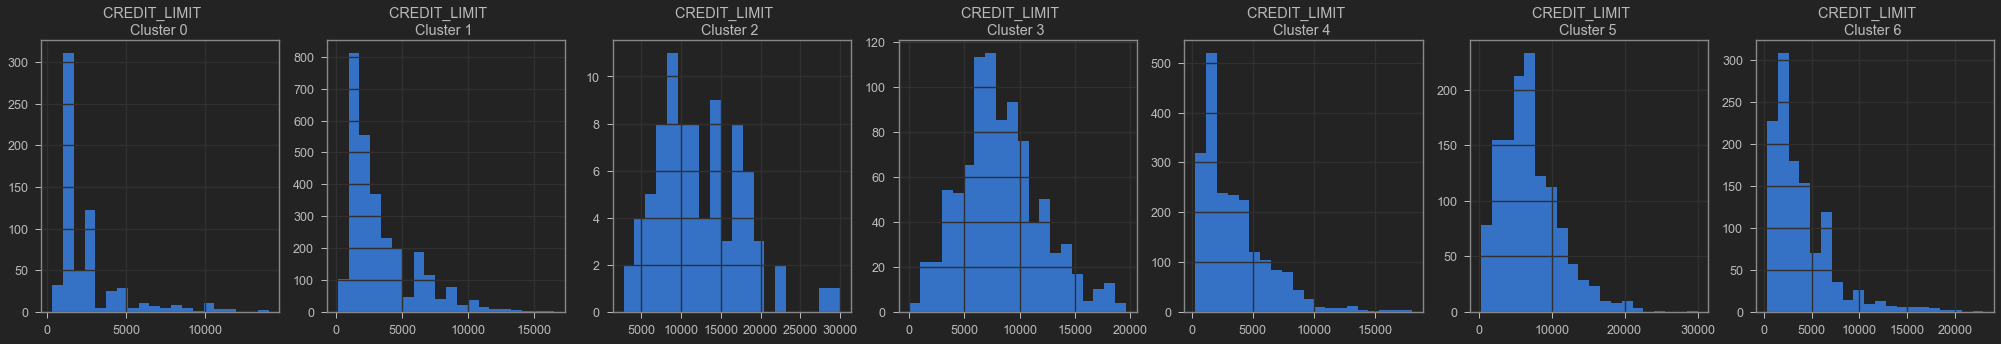

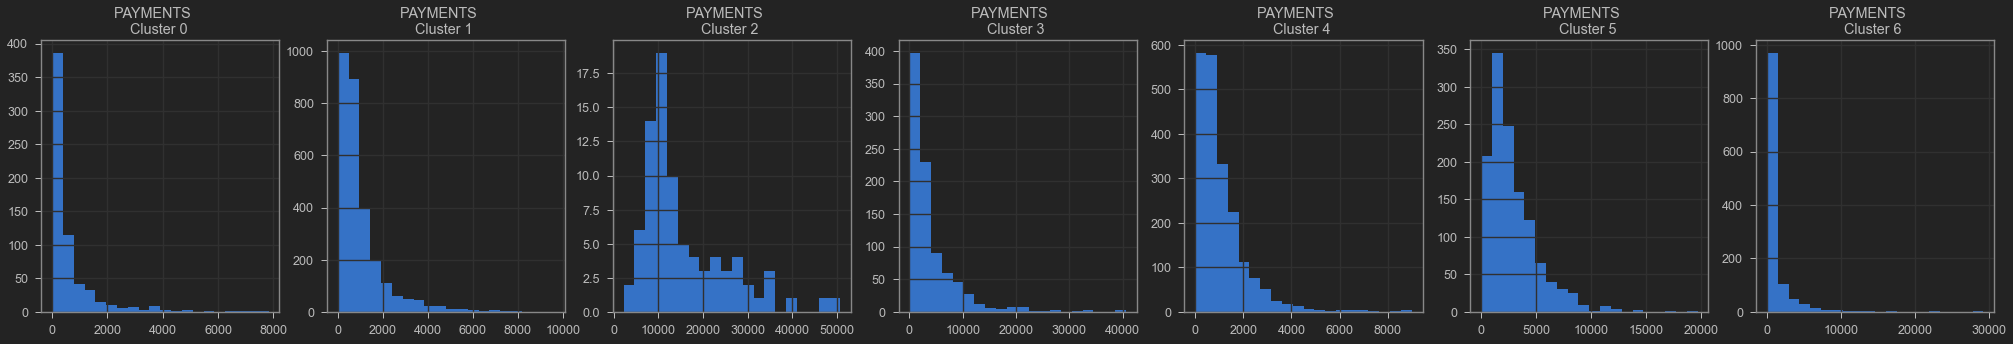

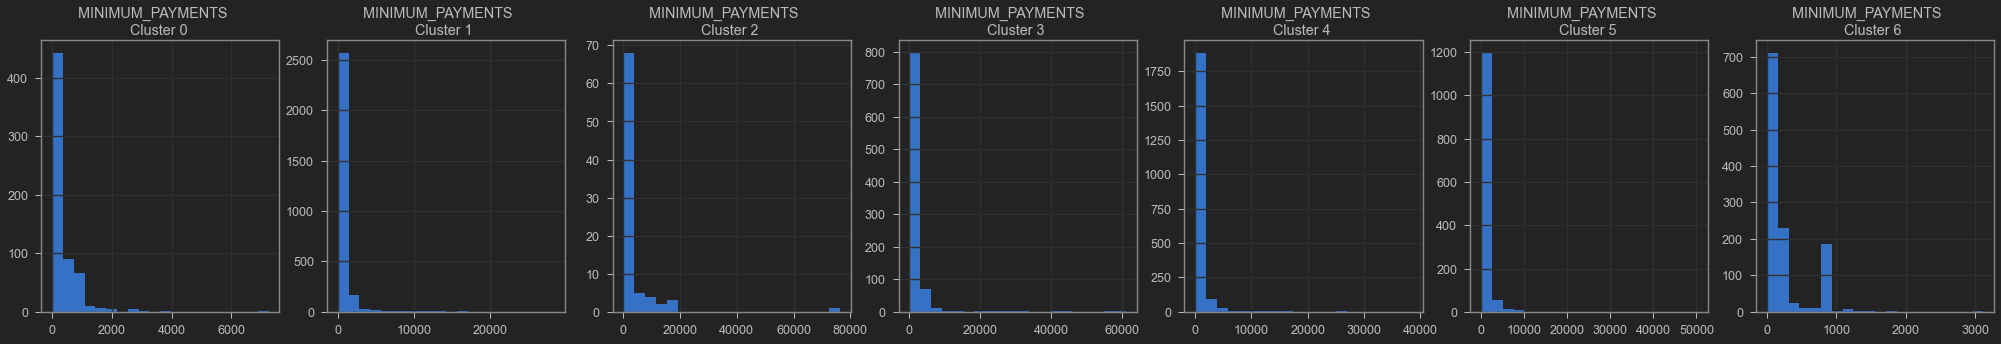

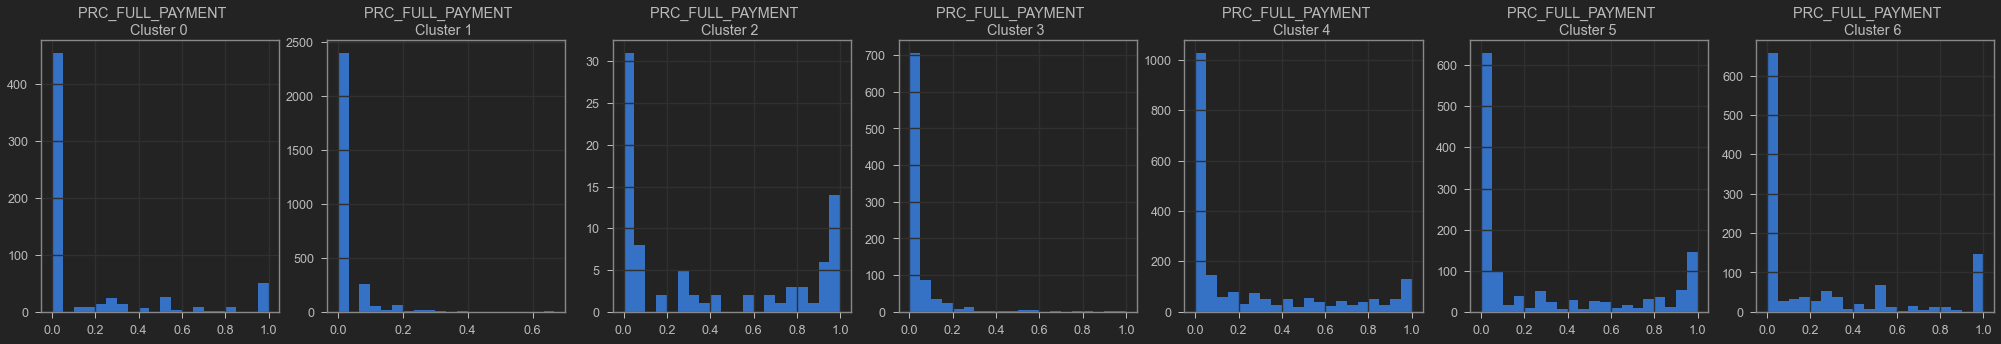

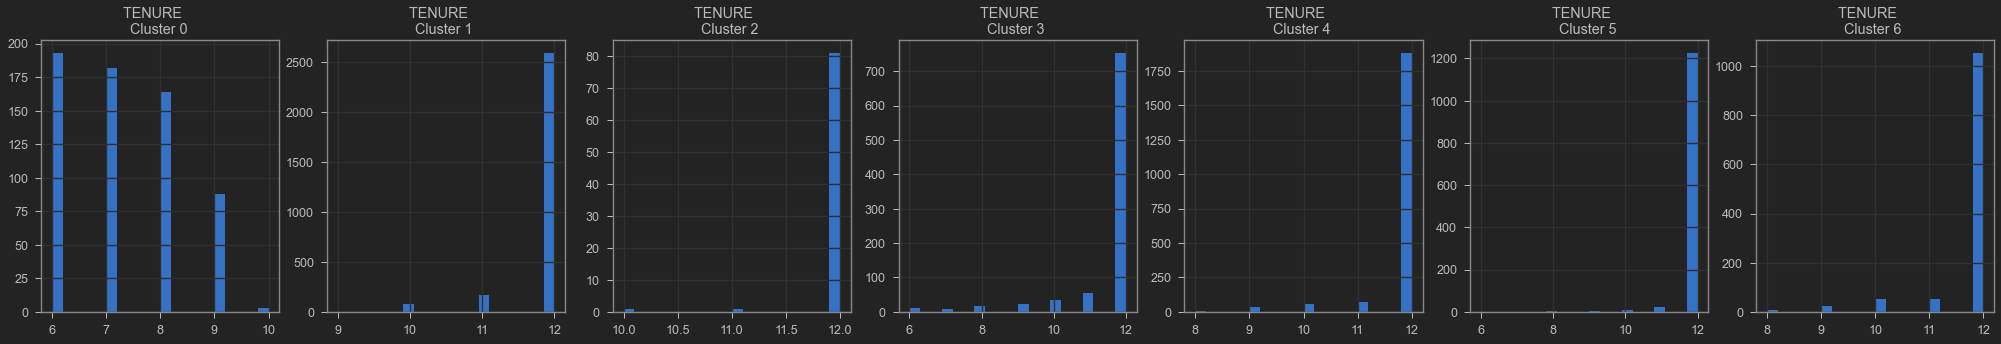

In [38]:

for i in data1.columns:
  plt.figure(figsize = (35, 5))
  for j in range(7):
    plt.subplot(1,7,j+1)
    cluster = data1_cluster[data1_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

### PRINCIPAL COMPONENT ANALYSIS

In [39]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(data1_scaled)
principal_comp 

array([[-1.68221972, -1.07644516],
       [-1.13829091,  2.50649656],
       [ 0.96967578, -0.38353256],
       ...,
       [-0.9262041 , -1.81078784],
       [-2.33654965, -0.65797014],
       [-0.55642317, -0.40048277]])

In [40]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076445
1,-1.138291,2.506497
2,0.969676,-0.383533
3,-0.873625,0.043183
4,-1.599434,-0.688581


In [41]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076445,1
1,-1.138291,2.506497,3
2,0.969676,-0.383533,5
3,-0.873625,0.043183,1
4,-1.599434,-0.688581,1


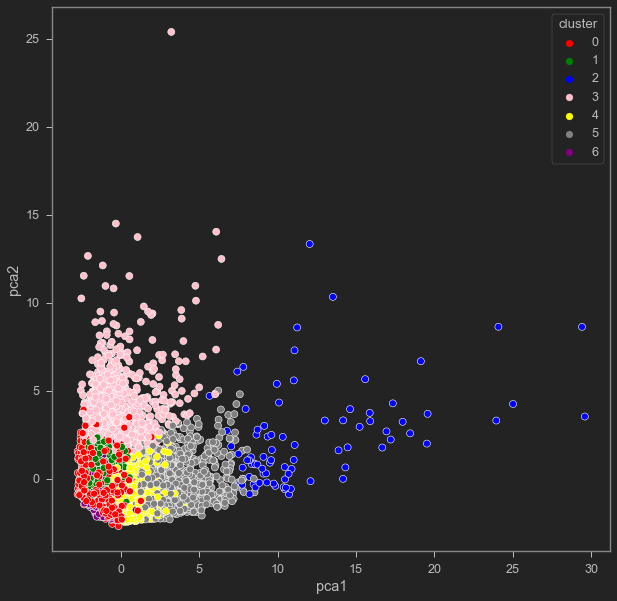

In [42]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple'])
plt.show()